# Which one is a better plan?

In the following project we are going to analyze the data of 500 clients of the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. Analyzing who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent will serve us to answer the question - which one of the prepaid plans brings more revenue.

## Initialization

In [1]:

# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Prepare the data

## Plans

In [2]:
#loading the data
try:
    plans=pd.read_csv("C:/Users/NELLY/Downloads/moved_megaline_plans.csv")
except:
    plans=pd.read_csv('/datasets/megaline_plans.csv')


In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


plan_name — calling plan name
usd_monthly_fee — monthly charge in US dollars
minutes_included — monthly minute allowance
messages_included — monthly text allowance
mb_per_month_included — data volume allowance (in megabytes)
usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
usd_per_message — price per text after exceeding the package limits
usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [4]:
# Print a sample of data for plans
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data looks fine. We don't see any need to fix it.

## Users

In [5]:
#load the data
try:
    users=pd.read_csv("C:/Users/NELLY/Downloads/moved_megaline_users.csv")
except:
    users=pd.read_csv('/datasets/megaline_users.csv')

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id — unique user identifier
first_name — user's name
last_name — user's last name
age — user's age (years)
reg_date — subscription date (dd, mm, yy)
churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
city — user's city of residence
plan — calling plan name

In [7]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The data includes 500 users. The data types looks okay except for reg_data and churn_date which we need to change from object to date type. there are 466 missing values in churn date but it seems alright because that means that the majority of the users in the telecom company did not leave it.

### Fix Data

Changing data type for two date variables:

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

## Calls

In [9]:
#loading the data:
try:
    calls=pd.read_csv("C:/Users/NELLY/Downloads/moved_megaline_calls.csv")
except:
    calls=pd.read_csv('/datasets/megaline_calls.csv')


In [10]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id — unique call identifier
call_date — call date
duration — call duration (in minutes)
user_id — the identifier of the user making the call

In [11]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [12]:
len(calls.user_id.unique())

481

The aren't missing values, the only problem we saw in the table is that call date is an object while it needs to be a datetime.

### Fix data

Changing the data type of call_date variable:

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enrich data

Creating a variable for months:

In [14]:
calls['month']=pd.to_datetime(calls['call_date']).dt.month


Since both plans are rounding uo every call to the next minute, we will create a new variable with rounded duration:

In [15]:
calls['round_dur'] = np.ceil(calls['duration'])

## Messages

In [16]:
# loading the data:
try:
    messages =pd.read_csv("C:/Users/NELLY/Downloads/moved_megaline_messages.csv")
except:
    messages=pd.read_csv('/datasets/megaline_messages.csv')


In [17]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


id — unique text message identifier
message_date — text message date
user_id — the identifier of the user sending the text

In [18]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The are no missing values, but the message_date data type is inappropriate and need to be a date instead of an object.

### Fix data

Changing the data type of message_date:

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

Creating a new variable for month:

In [20]:
messages['month']=pd.to_datetime(messages['message_date']).dt.month

## Internet

In [21]:
#loading the data:
try:
    internet=pd.read_csv("C:/Users/NELLY/Downloads/moved_megaline_internet.csv")
except:
    internet=pd.read_csv('/datasets/megaline_internet.csv')


In [22]:
# Print the general/summary information about the internet DataFrame:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


id — unique session identifier
mb_used — the volume of data spent during the session (in megabytes)
session_date — web session date
user_id — user identifier

In [23]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The are no missing values, but the session_date data type is inappropriate and need to be a date instead of an object.

### Fix data

Changing the data type of session_date:

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

Creating new variable for month:

In [25]:
internet['month']=pd.to_datetime(internet['session_date']).dt.month


creating new variable for Gigabytes per row:

In [26]:
internet['gb_used']= internet['mb_used']/1024

## Study plan conditions

In [27]:
# Print out the plan conditions
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


we can see that there are two plans. Each of them include a fixed amount of messages, minutes and megabytes in the monthly payment and have different tariffs for extra minutes/messages/gigabytes. Each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, the total for the month is rounded up. 
###If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [28]:
# Calculate the number of calls made by each user per month. Save the result.
num_calls = calls.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={'id':'calls'})
num_calls


,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [29]:
# Calculate the amount of minutes spent by each user per month. Save the result.
num_minutes = calls.groupby(['user_id','month'])['round_dur'].sum().reset_index().rename(columns={'round_dur':'minutes'})
num_minutes

,user_id,month,minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [30]:
# Calculate the number of messages sent by each user per month. Save the result.
num_messages = messages.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={'id':'messages'})
num_messages

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [31]:
# Calculate the volume of internet traffic used by each user per month.
num_internet = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()
#since the plans are rounding up the mb for every month we will round the variable in the table:
num_internet['gb_used'] = np.ceil(num_internet['gb_used'])
num_internet

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [32]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
from functools import reduce
data_frames = [num_calls,  num_minutes, num_messages, num_internet] 
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)
print(len(df_merged))
df_merged.tail()
#df_merged.info()

2293


,user_id,month,calls,minutes,messages,gb_used
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0
2292,1311,6,NaN,NaN,NaN,2.0


we see that there are missing values - meaning that specific user, in specific month, did not called/messaged or used the internet. We will fill those values with zero.

In [33]:
df_merged = df_merged.fillna(0.0)

In [34]:
#df_merged.info()
df_merged.head()

,user_id,month,calls,minutes,messages,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [35]:
# Add the plan information
df_merged['plan'] = df_merged['user_id'].map(users.set_index('user_id')['plan'])
#df_merged.head()

In [36]:
# Calculate the monthly revenue for each user
def cost(row):
    call_dur=row['minutes']
    message=row['messages']
    internet=row['gb_used']
    plan=row['plan']
    payment = plans[plans['plan_name']==plan]['usd_monthly_pay'].iloc[0]
    sms_included = plans[plans['plan_name']==plan]['messages_included'].iloc[0]
    internet_included = (plans[plans['plan_name']==plan]['mb_per_month_included'].iloc[0])/1024
    call_included = plans[plans['plan_name']==plan]['minutes_included'].iloc[0]
    extra_gb = plans[plans['plan_name']==plan]['usd_per_gb'].iloc[0]
    extra_sms = plans[plans['plan_name']==plan]['usd_per_message'].iloc[0]
    extra_call = plans[plans['plan_name']==plan]['usd_per_minute'].iloc[0]

#calculating calls' additional cost:
    if call_dur<=call_included:
        call_cost = 0
    else:
        call_cost = (call_dur-call_included)*extra_call
#calculating messages' additional cost:        
    if message<=sms_included:
        message_cost=0
    else:
        message_cost = (message-sms_included)*extra_sms
#calculating internet additional cost:
    if internet<=internet_included:
        internet_cost=0
    else:
        internet_cost=(internet-internet_included)*extra_gb
#calculate the total cost
    
    total_cost=payment+ call_cost + message_cost +internet_cost
    return total_cost


In [37]:
df_merged['total_cost']=df_merged.apply(cost,axis=1)

In [38]:
df_merged.head()

,user_id,month,calls,minutes,messages,gb_used,plan,total_cost
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70.00
1,1001,8,27.0,182.0,30.0,7.0,surf,20.00
2,1001,9,49.0,315.0,44.0,14.0,surf,20.00
3,1001,10,65.0,393.0,53.0,22.0,surf,90.09
4,1001,11,64.0,426.0,36.0,19.0,surf,60.00


## Study user behaviour

### Calls

### Compare average duration of calls per each plan per each distinct month:


In [39]:
avg_calls = df_merged.pivot_table(index='month', columns= 'plan', values='minutes', aggfunc= 'mean')
avg_calls
avg_calls_surf= avg_calls['surf'].mean()
avg_calls_ultimate= avg_calls['ultimate'].mean()

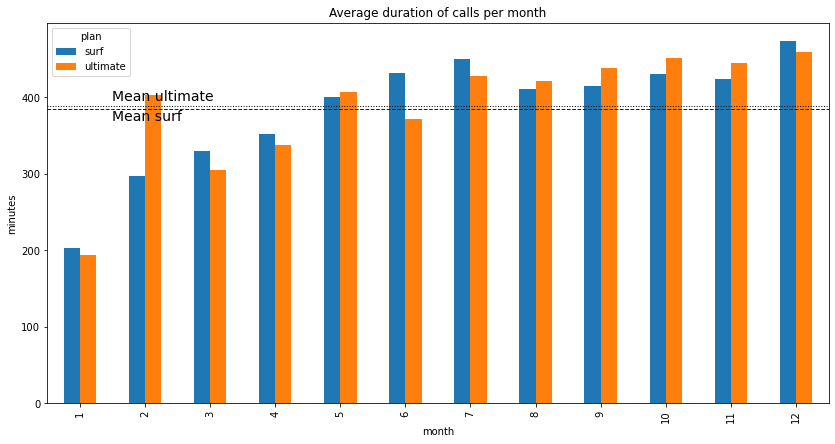

In [40]:
avg_calls.plot(figsize=(14,7), kind = 'bar')
plt.title('Average duration of calls per month')
plt.ylabel('minutes')
plt.axhline(y=avg_calls_surf,xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5,avg_calls_surf*0.96,'Mean surf', fontsize=14)
plt.axhline(y=avg_calls_ultimate ,xmin=0.0, xmax=1.0, color='k', linestyle='dotted', linewidth=1)
plt.text(0.5,avg_calls_ultimate*1.02,'Mean ultimate', fontsize=14)
plt.show()


We see that in each month, the average duration of calls look pretty much the same. 
looking on the overall mean of each plan, 'surf' plan has lower average calls duration than 'ultimate'.

### Compare the number of minutes users of each plan require each month:

In [41]:
avg_calls.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,384.469691,387.999742
std,76.535567,77.266064
min,203.000000,193.500000
25%,346.155000,362.432371
50%,412.168958,413.839000
75%,430.122211,439.432934
max,473.836478,459.099338


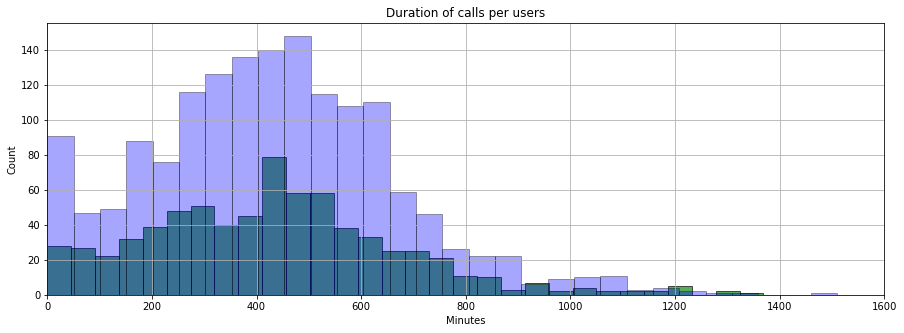

In [42]:
fig=plt.figure(figsize=(15,5))
df_merged.loc[df_merged['plan']=='ultimate','minutes'].hist(bins=30, color='g',edgecolor='k', alpha=0.65)
df_merged.loc[df_merged['plan']=='surf','minutes'].hist(bins=30, color='b',  edgecolor='k', alpha=0.35)
plt.title('Duration of calls per users')
plt.ylabel('Count')
plt.xlabel('Minutes')
plt.xlim(0,1600)
plt.show()

We see that overall there are less callers in 'ultimate' plan than in 'surf' plan. Both plans have right long tail.

In [43]:
# Calculate the mean and the variance of the monthly call duration
ulti_mean_c = avg_calls["ultimate"].mean()
ulti_var_c = np.var(avg_calls["ultimate"], ddof=1)
print(f"The average monthly call duration of 'ultimate' plan is {round(ulti_mean_c,2)} and the variance is {round(ulti_var_c,2)}")
surf_mean_c = avg_calls["surf"].mean()
surf_var_c = np.var(avg_calls['surf'], ddof=1)
print(f"The average monthly call duration of 'surf' plan is {round(surf_mean_c,2)} and the variance is {round(surf_var_c,2)}")

The average monthly call duration of 'ultimate' plan is 388.0 and the variance is 5970.04
The average monthly call duration of 'surf' plan is 384.47 and the variance is 5857.69


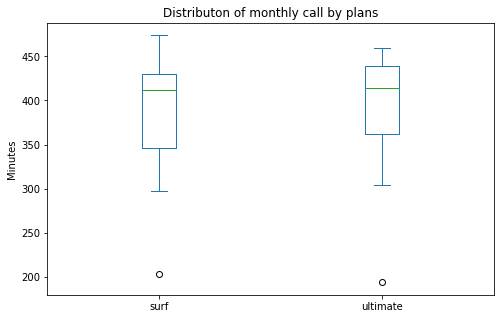

In [44]:
minute_calls = df_merged.pivot_table(index='month', columns= 'plan', values='minutes', aggfunc='mean')
# Plot a boxplot to visualize the distribution of the monthly call duration
minute_calls.plot(figsize=(8,5),kind='box')
plt.title('Distributon of monthly call by plans')
plt.ylabel('Minutes')
plt.show()

In summary, we can say that in 'ultimate' plan, the users call less but the average duration of their calls is higher than the average duration of the users of 'surf' plan; and the minimum duration is higher than the minimum duration in 'surf' and the values vary less, with smaller variance and standard deviation. That is interesting because the 'ultimate' plan includes much more free call minutes and lower tariff for extra minutes than the 'surf' plan.

### Messages

In [45]:
# Compare the number of messages users of each plan tend to send each month
sum_msg = df_merged.pivot_table(index='month', columns= 'plan', values='messages', aggfunc='sum')
sum_msg
sum_msg_surf= sum_msg['surf'].mean()
sum_msg_ultimate= sum_msg['ultimate'].mean()


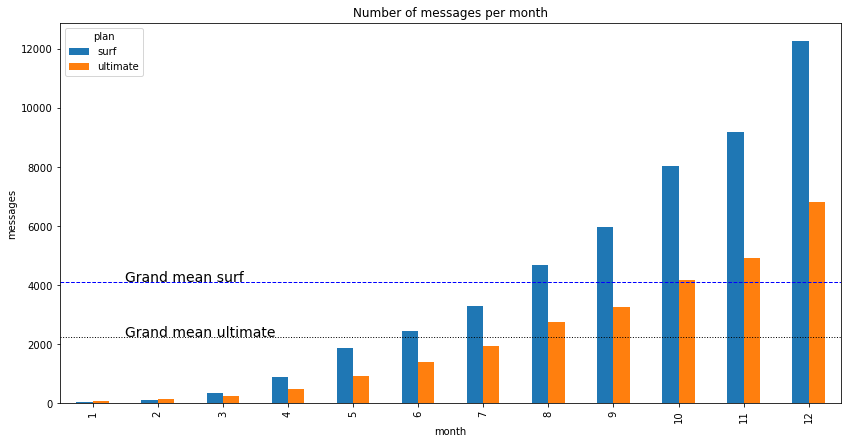

In [46]:
sum_msg.plot(figsize=(14,7), kind = 'bar')
plt.title('Number of messages per month')
plt.ylabel('messages')
plt.axhline(y=sum_msg_surf,xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5,sum_msg_surf*1.01,'Grand mean surf', fontsize=14)
plt.axhline(y=sum_msg_ultimate ,xmin=0.0, xmax=1.0, color='k', linestyle='dotted', linewidth=1)
plt.text(0.5,sum_msg_ultimate*1.01,'Grand mean ultimate', fontsize=14)
plt.show()


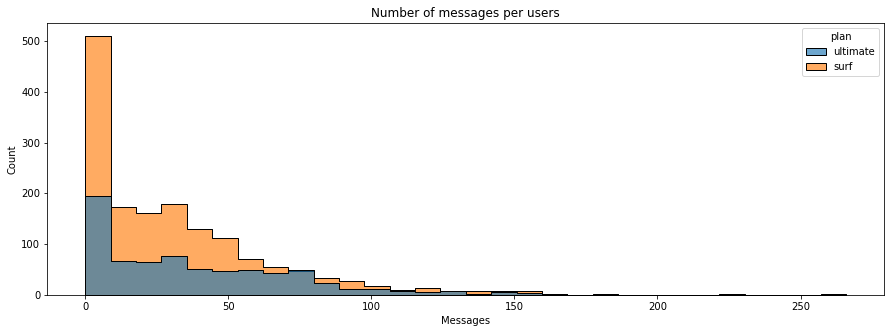

In [47]:
fig=plt.figure(figsize=(15,5))
sns.histplot(df_merged, x='messages', hue='plan', bins=30, color='g',edgecolor='k', alpha=0.65, element="step")
plt.title('Number of messages per users')
plt.ylabel('Count')
plt.xlabel('Messages')
plt.show()

We see that every month and overall the users in 'ultimate' plan, tend to send less messages than users in 'surf' plan. The majority of users in 'surf' and 'ultimate' plans send a small amount of messages and the histograms of both plans have right tail, meaning they are skewed to the right. 

In [48]:
#sum_msg.describe()

In [49]:
# Calculate the mean and the variance of the monthly messages
ulti_mean_m = sum_msg["ultimate"].mean()
ulti_var_m = np.var(sum_msg["ultimate"], ddof=1)
print(f"The average monthly messages of 'ultimate' plan is {round(ulti_mean_m,2)} and the variance is {round(ulti_var_m,2)}")
surf_mean_m = sum_msg["surf"].mean()
surf_var_m = np.var(sum_msg['surf'], ddof=1)
print(f"The average monthly messages of 'surf' plan is {round(surf_mean_m,2)} and the variance is {round(surf_var_m,2)}")

The average monthly messages of 'ultimate' plan is 2253.08 and the variance is 4699500.99
The average monthly messages of 'surf' plan is 4084.5 and the variance is 16107218.09


In summary, we can say that in 'ultimate' plan, the users send in average less messages than compared to the users of 'surf' plan; and this pattern is seen all over the year. That sounds counterintuitive because the 'ultimate' plan includes much more free messages and lower tariff for extra minutes than the 'surf' plan.

### Internet

In [50]:
#Compare average internet usage per each plan per each distinct month:
avg_int = df_merged.pivot_table(index='month', columns= 'plan', values='gb_used', aggfunc='mean')
avg_int
avg_int_surf= avg_int['surf'].mean()
avg_int_ultimate= avg_int['ultimate'].mean()

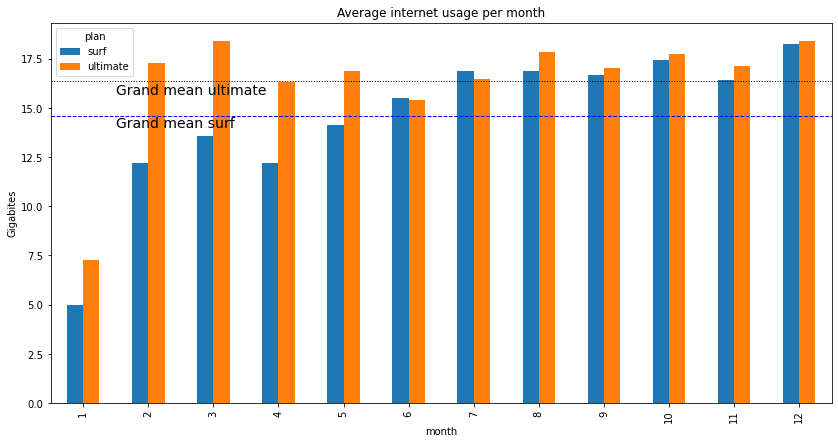

In [51]:
avg_int.plot(figsize=(14,7), kind = 'bar')
plt.title('Average internet usage per month')
plt.ylabel('Gigabites')
plt.axhline(y=avg_int_surf,xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5,avg_int_surf*0.96,'Grand mean surf', fontsize=14)
plt.axhline(y=avg_int_ultimate ,xmin=0.0, xmax=1.0, color='k', linestyle='dotted', linewidth=1)
plt.text(0.5,avg_int_ultimate*0.96,'Grand mean ultimate', fontsize=14)
plt.show()


We see that the average gb usage in months June-December is pretty much the same in both plans. But, on the earlier months of the year, the average use of 'ultimate' users is much higher. 

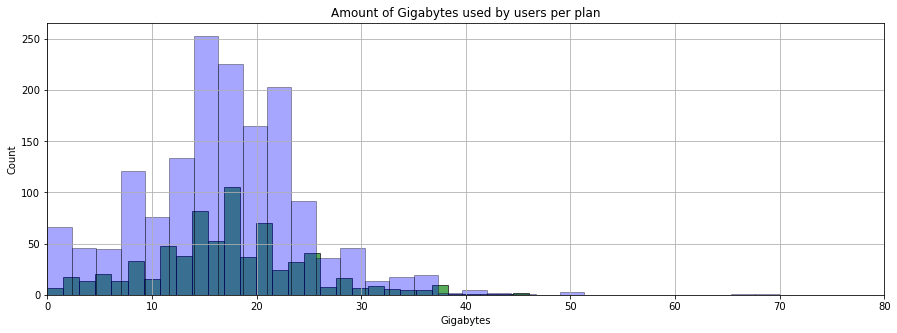

In [52]:
# Compare the amount of internet traffic consumed by users per plan
fig=plt.figure(figsize=(15,5))
df_merged.loc[df_merged['plan']=='ultimate','gb_used'].hist(bins=30, color='g',edgecolor='k', alpha=0.65)
df_merged.loc[df_merged['plan']=='surf','gb_used'].hist(bins=30, color='b',  edgecolor='k', alpha=0.35)
plt.title('Amount of Gigabytes used by users per plan')
plt.ylabel('Count')
plt.xlabel('Gigabytes')
plt.xlim(0,80)
plt.show()

Looking on the distribution of internet traffic of users we can see that there are more users in the 'surf' plan that use the internet on their cellphone. Both histograms looks like they are normally distributed.

In [53]:
ulti_var_i = np.var(avg_int["ultimate"], ddof=1)
print(f"The average monthly messages of 'ultimate' plan is {round(avg_int_ultimate,2)} and the variance is {round(ulti_var_i,2)}")
surf_var_i = np.var(avg_int['surf'], ddof=1)
print(f"The average monthly messages of 'surf' plan is {round(avg_int_surf,2)} and the variance is {round(surf_var_i,2)}")

The average monthly messages of 'ultimate' plan is 16.35 and the variance is 8.95
The average monthly messages of 'surf' plan is 14.59 and the variance is 13.16


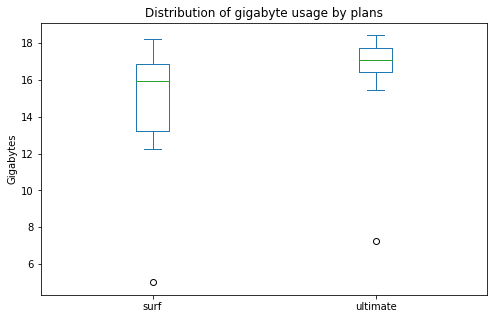

In [54]:
gb_int = df_merged.pivot_table(index='month', columns= 'plan', values='gb_used', aggfunc='mean')
# Plot a boxplot to visualize the distribution of the monthly gb usage
gb_int.plot(figsize=(8,5),kind='box')
plt.title('Distribution of gigabyte usage by plans')
plt.ylabel('Gigabytes')
plt.show()

In summary, we can say that in 'ultimate' plan, there are less users that use the data roaming compared to users in 'surf' plan, but the average usage of user is higher, and the values vary less, with smaller variance and standard deviation. That is reasonable because the 'ultimate' plan includes much more free megabytes and lower tariff for extra minutes than the 'surf' plan.

## Revenue

In [55]:
avg_revenue = df_merged.pivot_table(index='month', columns= 'plan', values='total_cost', aggfunc='mean')
avg_revenue
avg_rev_surf= avg_revenue['surf'].mean()
avg_rev_ultimate= avg_revenue['ultimate'].mean()

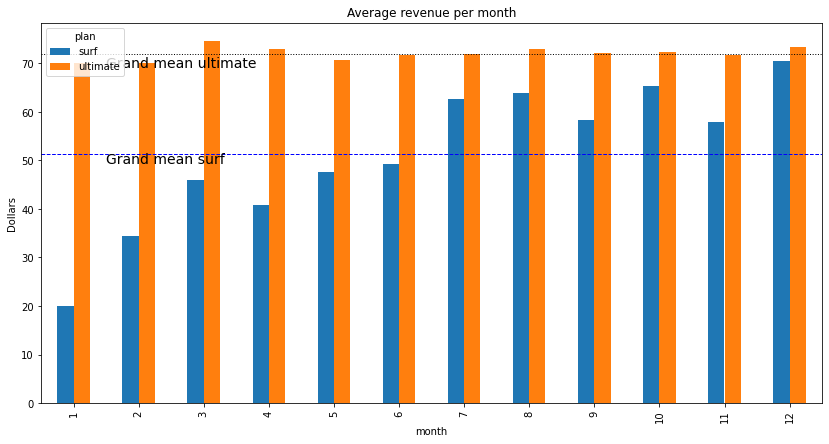

In [56]:
avg_revenue.plot(figsize=(14,7), kind = 'bar')
plt.title('Average revenue per month')
plt.ylabel('Dollars')
plt.axhline(y=avg_rev_surf,xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5,avg_rev_surf*0.96,'Grand mean surf', fontsize=14)
plt.axhline(y=avg_rev_ultimate ,xmin=0.0, xmax=1.0, color='k', linestyle='dotted', linewidth=1)
plt.text(0.5,avg_rev_ultimate*0.96,'Grand mean ultimate', fontsize=14)
plt.show()


We see that the average revenue from 'ultimate' plan stays almost the same over the year, unlike 'surf' average revenue that rise as the months goes by. But overall we can say that in average, the 'ultimate' plan seems like it is more profitable.

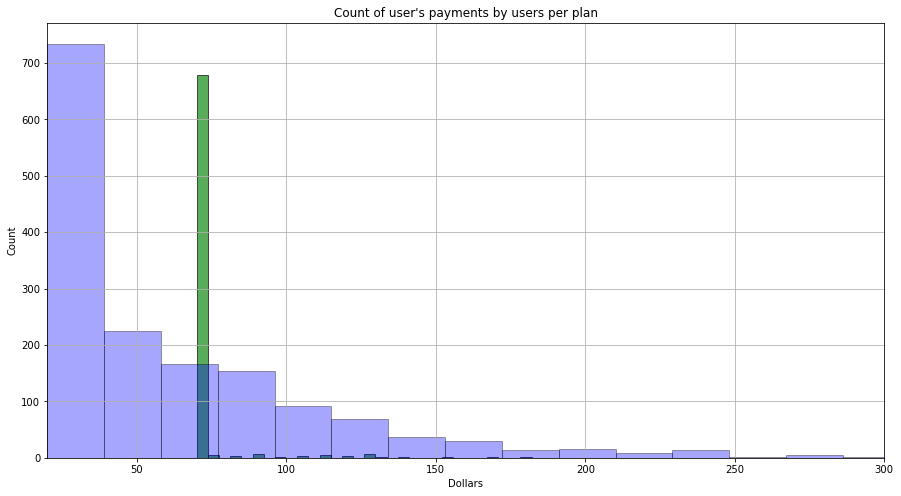

In [57]:
# Compare the amount of payments by users per plan
fig=plt.figure(figsize=(15,8))
df_merged.loc[df_merged['plan']=='ultimate','total_cost'].hist(bins=30, color='g',edgecolor='k', alpha=0.65)
df_merged.loc[df_merged['plan']=='surf','total_cost'].hist(bins=30, color='b',  edgecolor='k', alpha=0.35)
plt.title("Count of user's payments by users per plan")
plt.ylabel('Count')
plt.xlabel('Dollars')
plt.xlim(20,300)
plt.show()

In [58]:
ulti_var_r = np.var(avg_revenue["ultimate"], ddof=1)
print(f"The average monthly messages of 'ultimate' plan is {round(avg_rev_ultimate,2)} and the variance is {round(ulti_var_r,2)}")
surf_var_r = np.var(avg_revenue['surf'], ddof=1)
print(f"The average monthly messages of 'surf' plan is {round(avg_rev_surf,2)} and the variance is {round(surf_var_r,2)}")

The average monthly messages of 'ultimate' plan is 72.01 and the variance is 1.86
The average monthly messages of 'surf' plan is 51.4 and the variance is 216.04


We see in the graph above that almost all the users of 'ultimate' plan pay the fixed amount and only few of them exceed it and pay more, as seen in the small standard deviation. In the 'surf' plan most of the users pay less but the histogram varies more with higher variance.  

In [59]:
sum_revenue = df_merged.pivot_table(index='month', columns= 'plan', values='total_cost', aggfunc='sum')
sum_revenue
avg_s_rev_surf= sum_revenue['surf'].mean()
avg_s_rev_ultimate= sum_revenue['ultimate'].mean()

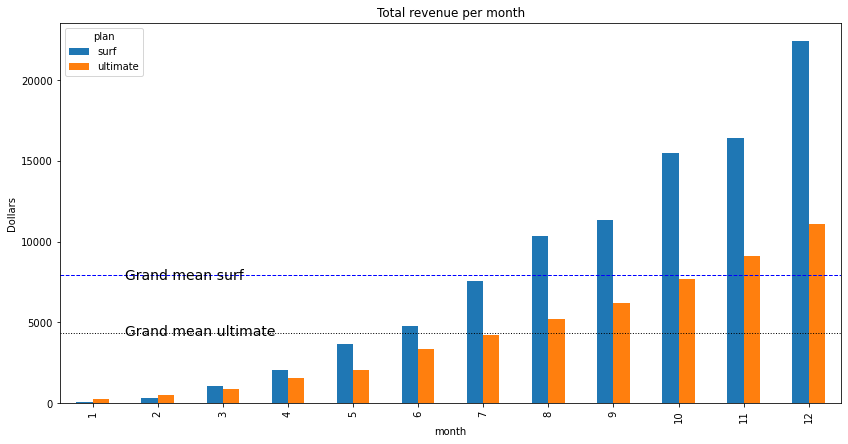

In [60]:
sum_revenue.plot(figsize=(14,7), kind = 'bar')
plt.title('Total revenue per month')
plt.ylabel('Dollars')
plt.axhline(y=avg_s_rev_surf,xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5,avg_s_rev_surf*0.96,'Grand mean surf', fontsize=14)
plt.axhline(y=avg_s_rev_ultimate ,xmin=0.0, xmax=1.0, color='k', linestyle='dotted', linewidth=1)
plt.text(0.5,avg_s_rev_ultimate*0.96,'Grand mean ultimate', fontsize=14)
plt.show()


In summary,we can say that the average revenue of 'ultimate' plan' users is much higher than the average revenue of 'surf' plan users, mostly because of the high basic payment (with only few users that exceed the maxumus sms/minutes/mb); but it is important to note that most part of the total revenue belongs to users from 'surf' plan since they are many more than users in 'ultimate' plan.

## Test statistical hypotheses

### Test if average revenue from users of the Ultimate and Surf calling plans differs.
H0- the avarage revenues of the plans are equal.
H1- the average revenues of the plans are different.
alpha-5%
We will check the hypothesis in a two-tailed t-test, with assumption of different variances (based on the last check of revenues).

In [61]:
cost_ultimate = df_merged.query('plan== "ultimate"')['total_cost'].reset_index(drop=True)
cost_surf = df_merged.query('plan== "surf"')['total_cost'].reset_index(drop=True)
#cost_ultimate.head()
#cost_surf.head()
alpha=0.05

In [62]:
# Test the hypotheses
results = st.ttest_ind(cost_ultimate, cost_surf, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis,  meaning that the mean of the 'ultimate' and 'surf' plan are insignificantly differnt")
else:
    print("We can't reject the null hypothesis, meaning that the means of the 'ultimate' and 'surf' plan are significantly differnt")


p-value: 3.17039054811355e-15
We reject the null hypothesis,  meaning that the mean of the 'ultimate' and 'surf' plan are insignificantly differnt


### Test if average revenue from users in the NY-NJ area and the rest ares differs.
H0- the avarage revenues of users in NY-NJ area and other ares are equal.
H1- the average revenues of  users in NY-NJ area and other ares are equal
alpha-5%
We will check the hypothesis in a two-tailed t-test, we will check the assumption regarding group's variances.


In [63]:
# Add the area
df_merged['area'] = df_merged['user_id'].map(users.set_index('user_id')['city'])
#df_merged.groupby('area')['area'].value_counts().sort_values()
cost_nynj = df_merged.query('area== "New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_cost'].reset_index(drop=True)
cost_other = df_merged.query('area!= "New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_cost'].reset_index(drop=True)

In [64]:
cost_nynj.describe()

count    377.000000
mean      59.921353
std       43.537865
min       20.000000
25%       20.000000
50%       51.770000
75%       72.460000
max      280.000000
Name: total_cost, dtype: float64

In [65]:
cost_other.describe()

count    1916.000000
mean       65.222771
std        47.170414
min        20.000000
25%        24.927500
50%        70.000000
75%        70.000000
max       590.370000
Name: total_cost, dtype: float64

In [66]:
# Test the hypotheses
if np.var(cost_nynj, ddof=1)== np.var(cost_other, ddof=1):
    results = st.ttest_ind(cost_nynj, cost_other, equal_var=True)
else: 
    results = st.ttest_ind(cost_nynj, cost_other, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis,meaning that the mean of the users in NY-NJ area and the users from the other areas are insignificantly differnt")
else:
    print("We can't reject the null hypothesis, meaning that the mean of the users in NY-NJ area and the users from the other areas are significantly differnt")



p-value: 0.03352561588530014
We reject the null hypothesis,meaning that the mean of the users in NY-NJ area and the users from the other areas are insignificantly differnt


## General conclusion
In the project we analyzed the information regarding 2 monthly plans of 500 users of a telecom operator. We filled missing values, changed incorrect data types and then merged the relevent information from 4 data frames into one - including the number of calls, total duration of calls, number of messages sent and data roaming in GB for every user in every month in 2018 year. We have calculated the monthly revenue, based on the prices and inforamtion we had, in order to understand users behavior.
1. there are less 'ultimate' users than 'surf users.
2. 'ultimate' plan users call less but the average duration of their calls is higher than the average duration of the users of 'surf' plan. Meaning that it will be more profitable to raise the amount of extra payment for minutes in 'ultimate' plan.
3. 'ultimate' plan users send in average less messages compared to the users of 'surf' plan. Meaning that it will be more profitable to raise the amount of extra payment for messages in 'surf' plan.
4. There are less'ultimate' plan users that use the data roaming compared to users in 'surf' plan, but the average usage of them is higher, and the values vary less.Meaning that it will be more profitable to raise the amount of extra payment for gigabytes in 'ultimate' plan.
4. The average revenue of 'ultimate' and 'surf' plans is significantly different.
5. the average revenue of users in NY-NJ area compared to other areas, is not significantly different.